In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
filepath = '.\\train'
images = [] #儲存影像
fileslist = [] #儲存影像名稱與路徑
counter = 0
import os
for root, dirs, files in os.walk(filepath, topdown=False):
    for name in tqdm(files):
        counter +=  1
        #if counter % 1000 == 0:
        #    print('The status is', counter)
        filename = os.path.join(root, name)
        fileslist.append(filename)
        images.append(plt.imread(filename))

100%|████████████████████████████████████████████████████████████████████████████| 21765/21765 [03:45<00:00, 96.70it/s]


In [2]:
fileslist[:3]

['.\\train\\00000.jpg', '.\\train\\00001.jpg', '.\\train\\00002.jpg']

In [3]:
import pandas as pd
label = pd.read_csv('train_labels.csv')
label[:10]

,filename,infected
0,00000.jpg,1
1,00001.jpg,1
2,00002.jpg,1
3,00003.jpg,0
4,00004.jpg,0
5,00005.jpg,1
6,00006.jpg,0
7,00007.jpg,1
8,00008.jpg,1
9,00009.jpg,0


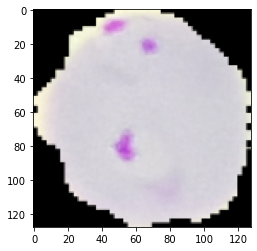

In [4]:
import matplotlib.pyplot as plt
plt.imshow(images[1])
plt.show()

In [23]:
%%time
def infected(f):
    return(label[label.filename==f.split('\\')[-1]].infected.values[0])
y = [infected(f) for f in fileslist]

Wall time: 26.1 s


In [20]:
import numpy as np
X = np.array(images).astype('uint8')
X.shape

(21765, 128, 128, 3)

In [22]:
import numpy as np
train = int(np.floor(X.shape[0] * 0.8))

X_train, y_train = X[:train], y[:train]
X_valid, y_valid = X[train:], y[train:]

X_train.shape, X_valid.shape

((17412, 128, 128, 3), (4353, 128, 128, 3))

In [23]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,2)
y_test = to_categorical(y_valid,2)

In [28]:
np.save('X_train',X_train)
np.save('y_train',y_train)
np.save('X_test',X_valid)
np.save('y_test',y_test)